In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from get_geometric_mean_annual_return import get_geometric_mean_annual_return
from get_geometric_mean_annual_return_jpy import get_geometric_mean_annual_return_jpy

In [3]:
sp500_ticker = '^GSPC'
usd_jpy_ticker = 'JPY=X'

sp500_data = yf.download(sp500_ticker, start='2010-01-01', end='2024-09-20')
usd_jpy_ticker = yf.download(usd_jpy_ticker, start='2010-01-01', end='2024-09-20')

sp500_data['Close_JPY'] = sp500_data['Close'] * usd_jpy_ticker['Close']

print(sp500_data.head())
print(usd_jpy_ticker.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  1132.989990   
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  1136.520020   
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  1137.140015   
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  1141.689941   
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  1144.979980   

                Volume      Close_JPY  
Date                                   
2010-01-04  3991400000  104795.912259  
2010-01-05  2491020000  104088.184948  
2010-01-06  4972660000  105021.706386  
2010-01-07  5270680000  106622.422931  
2010-01-08  4389590000  106093.849183  
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2010-01-01  92.940

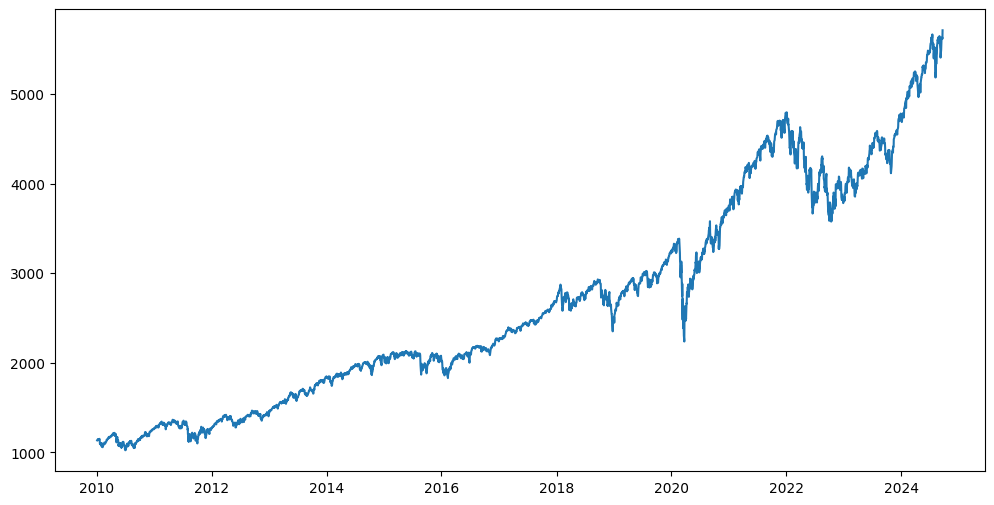

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Close'], label='SP500')
plt.show()

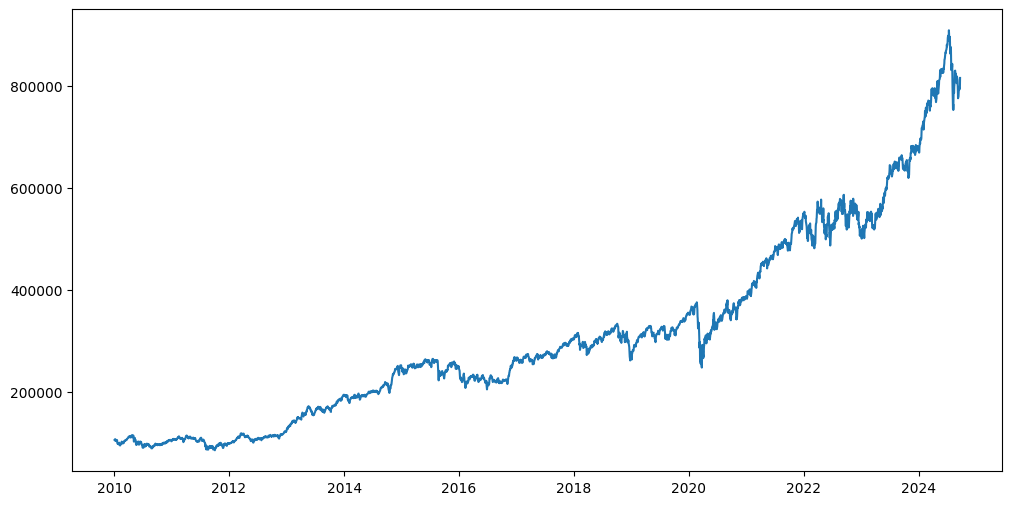

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Close_JPY'], label='SP500')
plt.show()

In [6]:
geometric_mean_annual_return_sp500 = get_geometric_mean_annual_return(sp500_data)
print(f'SP500: {geometric_mean_annual_return_sp500:.2f}%')

SP500: 11.39%


In [7]:
geometric_mean_annual_return_sp500_jpy = get_geometric_mean_annual_return_jpy(sp500_data)
print(f'SP500 JPY: {geometric_mean_annual_return_sp500_jpy:.2f}%')

SP500 JPY: 14.94%


In [8]:
# 日次リターンの標準偏差を計算する
daily_volatility = sp500_data['Return'].std()

# 年次リスク（標準偏差）を計算する
annual_volatility = daily_volatility * np.sqrt(252)  # 252は1年の取引日数の平均

print(f"SP500の年次リスク（標準偏差）: {annual_volatility:.6f}")

SP500の年次リスク（標準偏差）: 0.173192
